In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport
import sys

sys.path.append('../')
pd.set_option('display.max_columns', None)

from config.paths import PROCESSED_DATA_PATH, CONFIG_PATH
from utils.file_management import read_yaml

In [2]:
df = pd.read_parquet(f'{PROCESSED_DATA_PATH}/preprocessed_dataset.parquet')
features = read_yaml(f'{CONFIG_PATH}/features.yaml')
target = features['target']

In [3]:
cols_to_use = ['price', 'city', 'yearBuilt', 'description', 'lotAreaUnits', 'parking', 'garageSpaces', 'hasGarage', 'pool',
               'spa', 'homeType', 'county', 'livingAreaMts', 'livingAreaMts_log', 'mapped_yearBuilt', 'mapped_bathrooms', 
               'mapped_bedrooms', 'mapped_levels']
df = df[cols_to_use]

# Preprocessing

In [4]:
z

Dataframe shape: (29446, 18)


price      city  yearBuilt  \
0  145000.0  Gold Run        NaN   
1  675000.0    Pinole  1950-1975   
2  649000.0    Pinole  1950-1975   

                                         description lotAreaUnits  parking  \
0  Amazing opportunity to build your dream home O...        Acres        0   
1  "Great house in a wonderful neighborhood!  Wal...         sqft        1   
2  "Light-filled mid-century 3 BR 2 BA home in th...        Acres        1   

   garageSpaces  hasGarage  pool  spa       homeType               county  \
0           0.0          0     0    0            LOT        Placer County   
1           2.0          1     0    0  SINGLE_FAMILY  Contra Costa County   
2           2.0          1     0    0  SINGLE_FAMILY  Contra Costa County   

   livingAreaMts  livingAreaMts_log  mapped_yearBuilt  mapped_bathrooms  \
0   0.000000e+00           0.000000                -1                -1   
1   1.552409e+02           7.421776                 3                 2   
2   5.722260e+06           7.254885                 3                 2   

   mapped_bedrooms  mapped_levels  
0               -1              0  
1                3              1  
2                3              1

# EDA

In [5]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
def plot_average_price(df, target):
  """
  Plots the average price of a property for each category of a categorical variable.

  Args:
    df: The dataset.
    target: The target variable.

  Returns:
    None.
  """

  # Select categorical variables with less than 10 categories.
  categorical_variables = [
      var for var in df.columns if df[var].nunique() < 10
  ]

  for var in categorical_variables:
    # Calculate the average price of a property for each category.
    averages = df.groupby(var)[target].mean()

    # Create the bar chart.
    plt.bar(averages.index, averages.values)
    plt.title(f"Average property price by {var}")
    plt.show()

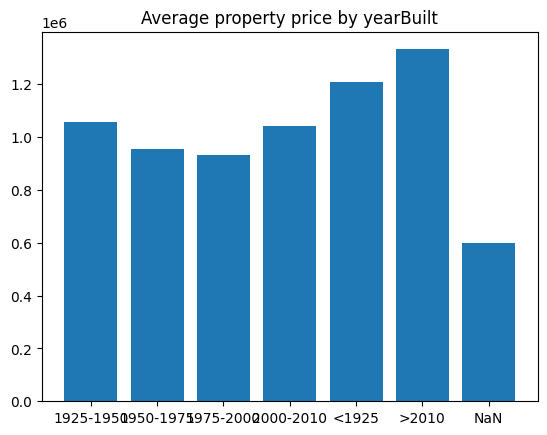

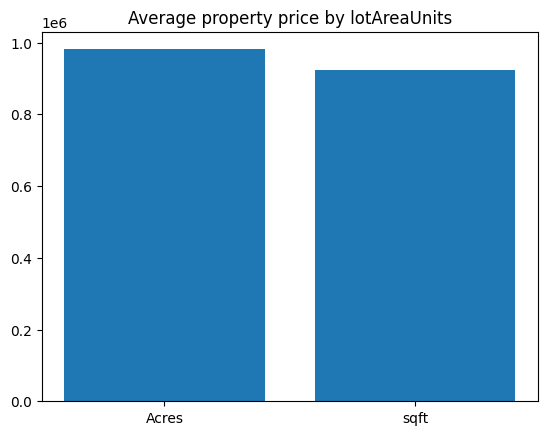

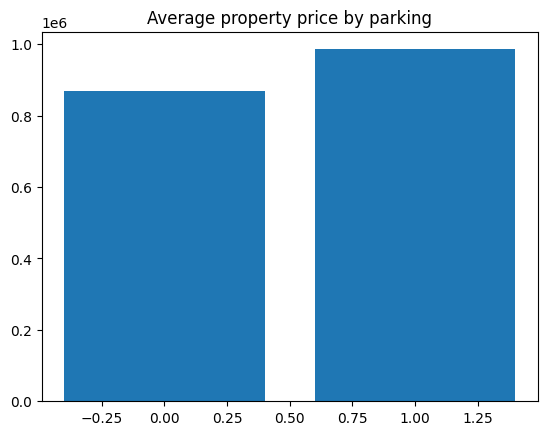

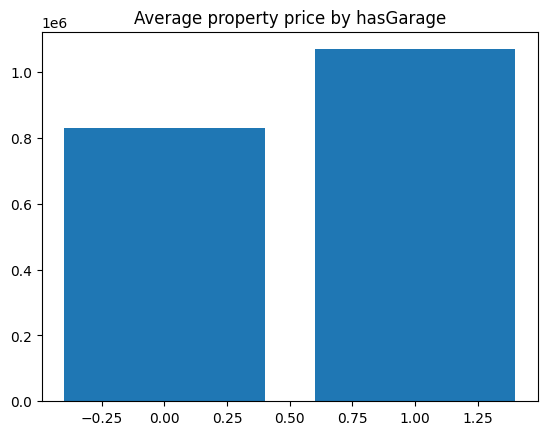

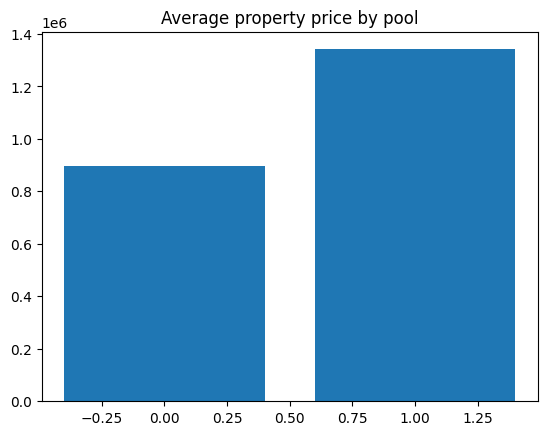

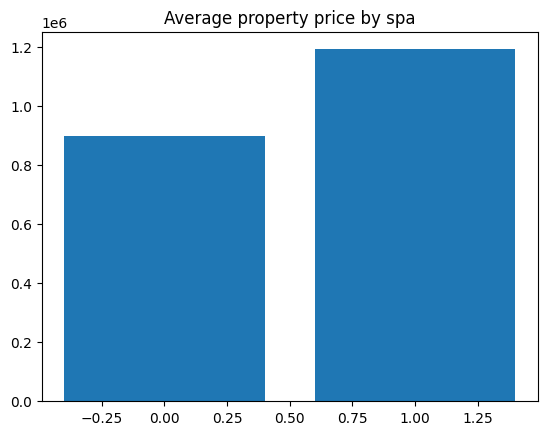

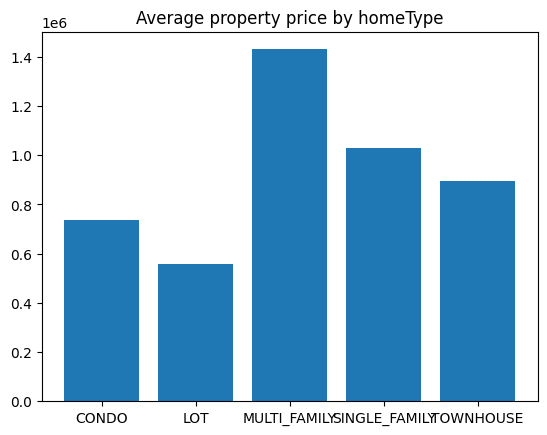

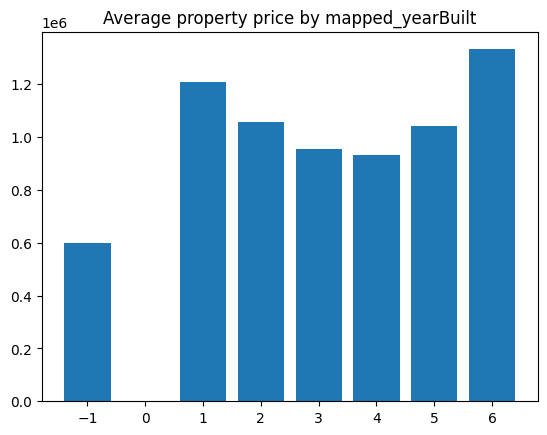

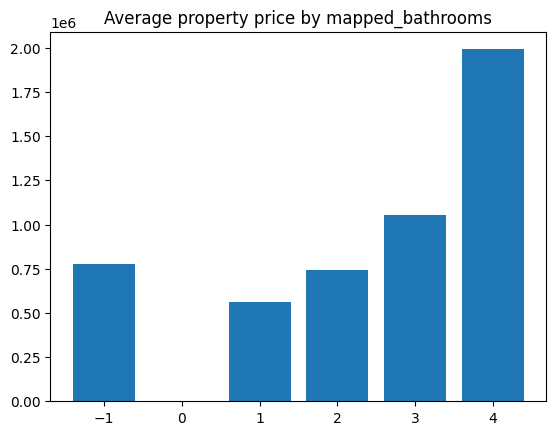

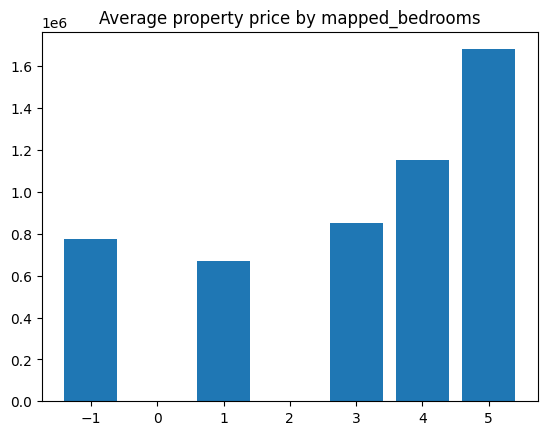

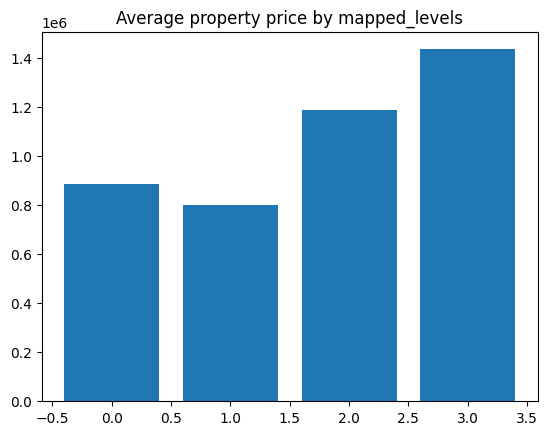

In [10]:
plot_average_price(df, 'price')